## Observations and Insights

## Dependencies and starter code

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as st
from scipy.stats import linregress
import random
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

mouse_study_merge = pd.merge(mouse_metadata, study_results)

mouse_study_merge.head(100)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


## Summary statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_group_unique = mouse_study_merge['Drug Regimen'].unique()

mouse_study_group = mouse_study_merge.groupby('Drug Regimen')

mouse_study_group_mean = mouse_study_group['Tumor Volume (mm3)'].mean()

mouse_study_group_median = mouse_study_group['Tumor Volume (mm3)'].median(skipna = True) 

mouse_study_group_variance = mouse_study_group['Tumor Volume (mm3)'].var()

mouse_study_group_std = mouse_study_group['Tumor Volume (mm3)'].std()

mouse_study_group_sem = mouse_study_group['Tumor Volume (mm3)'].sem()

mouse_study_group_df = {'Mean':mouse_study_group_mean
                  ,'Median':mouse_study_group_median
                    ,'Variance': mouse_study_group_variance
                     ,'STD':mouse_study_group_std
                        ,'SEM':mouse_study_group_sem
                    }

msg = pd.DataFrame(mouse_study_group_df)


x_axis = np.arange(len(mouse_study_group_unique))

msg

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

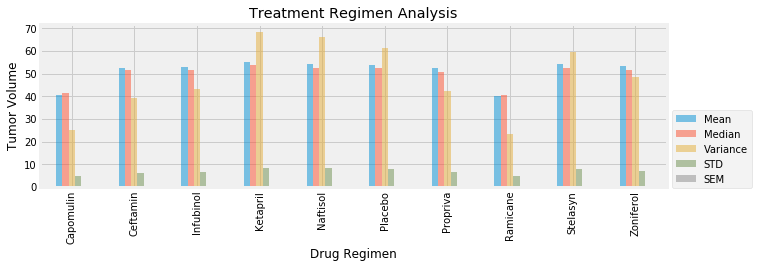

In [26]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

msg.plot(kind="bar", figsize=(10,3), alpha=0.5)

plt.title("Treatment Regimen Analysis")
plt.ylabel("Tumor Volume")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))


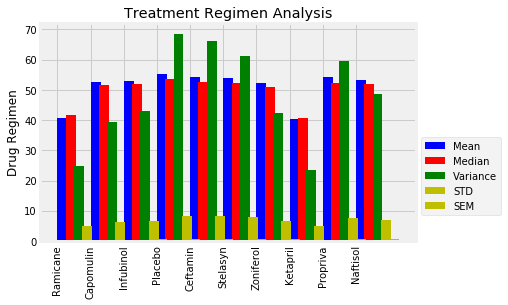

In [27]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
bar_width=0.3

plt.bar(x_axis+0.00,msg['Mean'], color='b', width=bar_width, label="Mean", align='edge')

plt.bar(x_axis+0.25,msg['Median'], color='r', width=bar_width, label="Median", align='edge')

plt.bar(x_axis+0.5,msg["Variance"], color='g', width=bar_width, label="Variance", align='edge')

plt.bar(x_axis+0.75,msg["STD"], color='y', width=bar_width, label="STD", align='edge')

plt.bar(x_axis+1.00,msg["SEM"], color='y', width=bar_width, label="SEM", align='edge')

plt.title("Treatment Regimen Analysis")

plt.ylabel("Tumor Volume")

plt.ylabel("Drug Regimen")

        
plt.xticks(x_axis, mouse_study_group_unique, rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))



## Pie plots

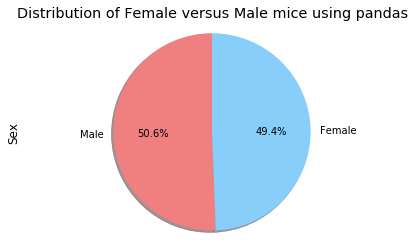

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.title("Distribution of Female versus Male mice using pandas")

colors = ["lightcoral", "lightskyblue"]


mouse_study_merge_sex = mouse_study_merge['Sex'].value_counts()
mouse_study_merge_sex

mouse_study_merge_sex.plot(kind="pie", colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()



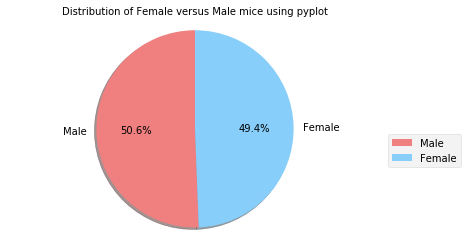

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Distribution of Female versus Male mice using pyplot",fontsize=10)

colors = ["lightcoral", "lightskyblue"]

labels = ["Male", "Female",]

mouse_study_merge_sex = mouse_study_merge['Sex'].value_counts()
mouse_study_merge_sex

plt.pie(mouse_study_merge_sex,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),fontsize = 10)
plt.show()


## Quartiles, outliers and boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_study_grouped = mouse_study_merge.groupby('Mouse ID')
max_timepoint = mouse_study_grouped[["Timepoint"]].max()
max_timepoint.reset_index(level=0,inplace=True)

mouse_final_tumor_vol = pd.merge(mouse_study_merge,max_timepoint, on=["Mouse ID","Timepoint"])

top_4_drug_regimen = msg.sort_values("Median")
top_4_drug_regimen = top_4_drug_regimen.nsmallest(4,"Median")

top_4_drug_regimen.reset_index(level=0, inplace=True)
top_4_drug_regimen = top_4_drug_regimen[["Drug Regimen"]]

 
top_mouse_final_tumor_vol = pd.merge(mouse_final_tumor_vol,top_4_drug_regimen ,on="Drug Regimen")
# mouse_final_timepoint_df

#top_mouse_final_tumor_vol

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = top_mouse_final_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

 

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

 

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

 

outlier_volume = top_mouse_final_tumor_vol.loc[(top_mouse_final_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (top_mouse_final_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume



The lower quartile of tumor volume is: 37.2898392225
The upper quartile of tumor volume is: 58.463205455
The interquartile range of tumor volume is: 21.1733662325
The the median of tumor volume is: 45.0 
Values below 5.529789873749998 could be outliers.
Values above 90.22325480375 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


Text(0.5, 0.98, 'Final tumor volume for four regimens of interest ')

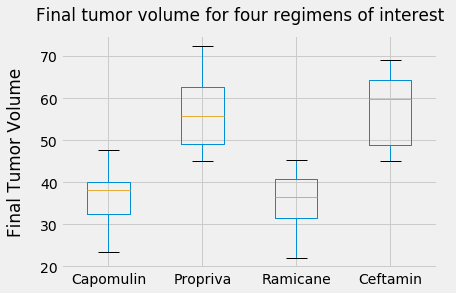

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mouse_data_box = top_mouse_final_tumor_vol[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

Capomulin_boxplot = mouse_data_box.loc[mouse_data_box['Drug Regimen']=='Capomulin']
Capomulin_boxplot = Capomulin_boxplot['Tumor Volume (mm3)']
Capomulin_boxplot = Capomulin_boxplot.rename(columns={'Tumor Volume (mm3)':'Capomulin'})

Ceftamin_boxplot = mouse_data_box.loc[mouse_data_box['Drug Regimen']=='Ceftamin']
Ceftamin_boxplot = Ceftamin_boxplot['Tumor Volume (mm3)']
Ceftamin_boxplot = Ceftamin_boxplot.rename(columns={'Tumor Volume (mm3)':'Ceftamin'})

Propriva_boxplot = mouse_data_box.loc[mouse_data_box['Drug Regimen']=='Propriva']
Propriva_boxplot = Propriva_boxplot['Tumor Volume (mm3)']
Propriva_boxplot = Propriva_boxplot.rename(columns={'Tumor Volume (mm3)':'Propriva'})

Ramicane_boxplot = mouse_data_box.loc[mouse_data_box['Drug Regimen']=='Ramicane']
Ramicane_boxplot = Ramicane_boxplot['Tumor Volume (mm3)']
Ramicane_boxplot = Ramicane_boxplot.rename(columns={'Tumor Volume (mm3)':'Ramicane'})

mouse_study_boxplot = pd.DataFrame({'Capomulin':Capomulin_boxplot
                  ,'Propriva':Propriva_boxplot
                    ,'Ramicane': Ramicane_boxplot
                     ,'Ceftamin':Ceftamin_boxplot
                        
                    })


msb = mouse_study_boxplot
msb.boxplot()
msb.fillna(0)
msb
plt.ylabel('Final Tumor Volume', labelpad=15)
plt.suptitle("Final tumor volume for four regimens of interest ")



## Line and scatter plots

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1883,z969,Naftisol,Male,9,30,0,45.000000,0
1,1884,z969,Naftisol,Male,9,30,5,49.332999,0
2,1885,z969,Naftisol,Male,9,30,10,52.656081,1
3,1886,z969,Naftisol,Male,9,30,15,54.713005,2
4,1887,z969,Naftisol,Male,9,30,20,57.898778,2
5,1888,z969,Naftisol,Male,9,30,25,63.145652,2
6,1889,z969,Naftisol,Male,9,30,30,65.841013,3
7,1890,z969,Naftisol,Male,9,30,35,69.176246,4
8,1891,z969,Naftisol,Male,9,30,40,70.314904,4
9,1892,z969,Naftisol,Male,9,30,45,73.867845,4


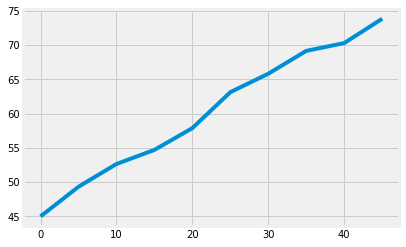

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = mouse_study_merge.loc[mouse_study_merge["Drug Regimen"]=='Capomulin']
capomulin_df_mouse = mouse_study_merge.loc[mouse_study_merge["Mouse ID"]=='z969']
capomulin_df_mouse = capomulin_df_mouse.reset_index()
x_axis = capomulin_df_mouse['Timepoint']
y_axis = capomulin_df_mouse['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.style.use('fivethirtyeight')
capomulin_df_mouse

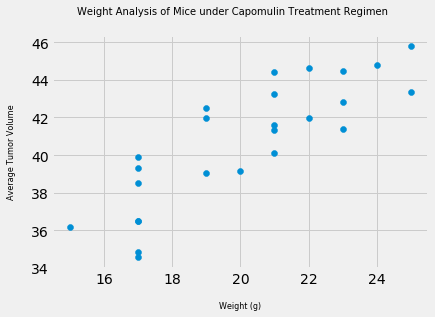

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_gp_df = capomulin_df.groupby('Mouse ID')
x_axis = capomulin_gp_df[['Weight (g)']].mean()
y_axis= capomulin_gp_df[['Tumor Volume (mm3)']].mean()


plt.scatter(x=x_axis ,y=y_axis)
plt.xlabel('Weight (g)',labelpad=15, fontsize= 8)
plt.ylabel('Average Tumor Volume', labelpad=15,fontsize=8)
plt.suptitle("Weight Analysis of Mice under Capomulin Treatment Regimen ", fontsize=10)
plt.show()

The correlation between both factors is 0.84


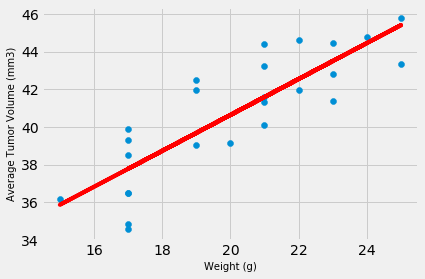

In [37]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = x_axis['Weight (g)'].tolist()
Avg_tumor_volume = y_axis['Tumor Volume (mm3)'].tolist()
correlation = st.pearsonr(weight,Avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight , Avg_tumor_volume)
regress_values = np.asarray(weight)  * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(round(intercept,2))
plt.scatter(weight ,Avg_tumor_volume)
plt.plot(weight ,regress_values,"r-")
plt.xlabel('Weight (g)',fontsize=10)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=10)
plt.show()